In [1]:
from utils import *

In [3]:
img_fn = ["./input/hdr0.jpg", "./input/hdr1.jpg", "./input/hdr2.jpg", "./input/hdr3.jpg"]
img_list = [readImage(fn) for fn in img_fn]
exposure_times = np.array([15.0, 2.5, 0.25, 0.0333], dtype=np.float32)

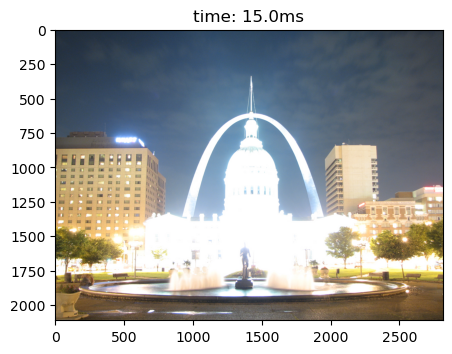

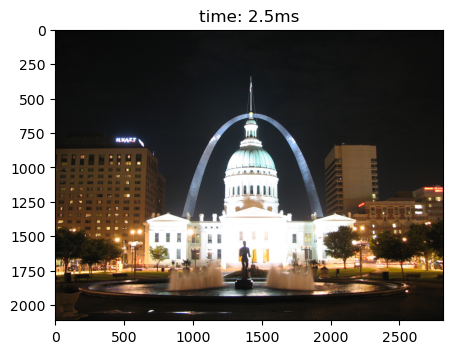

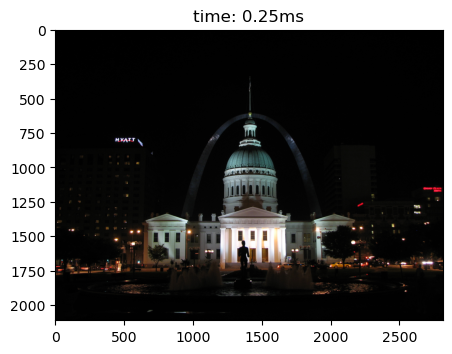

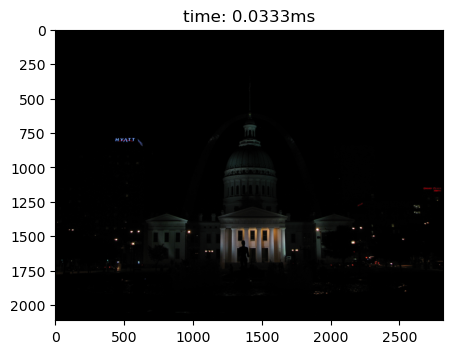

In [13]:
for img, title in zip(img_list, exposure_times):
    showImage(img, "time: "+str(title)+"ms")

In [4]:
# 将曝光合成HDR图像
merge_debevec = cv.createMergeDebevec()
hdr_debevec = merge_debevec.process(img_list, times=exposure_times.copy())
merge_robertson = cv.createMergeRobertson()
hdr_robertson = merge_robertson.process(img_list, times=exposure_times.copy())

In [7]:
# 色调图HDR图像
tonemap1 = cv.createTonemap(gamma=2.2)
res_debevec = tonemap1.process(hdr_debevec.copy())
tonemap2 = cv.createTonemap(gamma=2.2)
res_robertson = tonemap2.process(hdr_robertson.copy())

In [8]:
# 使用Mertens融合曝光
merge_mertens = cv.createMergeMertens()
res_mertens = merge_mertens.process(img_list)

C:\Users\25335\AppData\Local\Temp\ipykernel_20780\3708915170.py:2: RuntimeWarning: invalid value encountered in cast
  res_debevec_8bit = np.clip(res_debevec*255, 0, 255).astype('uint8')


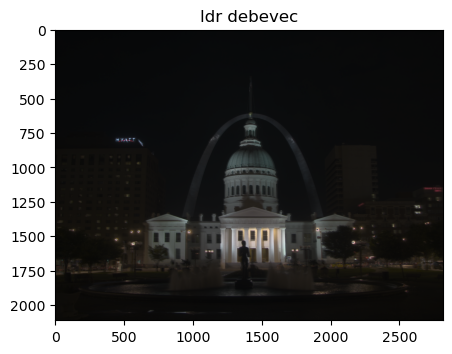

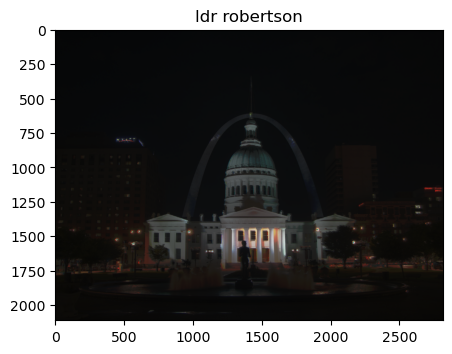

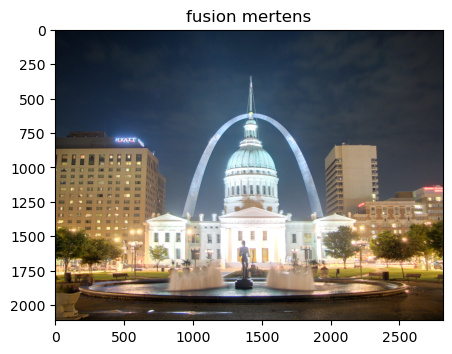

In [14]:
# 转化数据类型为8-bit并保存
res_debevec_8bit = np.clip(res_debevec*255, 0, 255).astype('uint8')
res_robertson_8bit = np.clip(res_robertson*255, 0, 255).astype('uint8')
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
showImage(res_debevec_8bit, "ldr debevec")
showImage(res_robertson_8bit, "ldr robertson")
showImage(res_mertens_8bit, "fusion mertens")
